# Linear Regression

## Advertisment Data From GitHub

## Want to see what feature effects sales

### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

data = pd.read_excel('advertisment.xlsx')

In [2]:
import seaborn as sns

In [3]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Data Cleaning Quick

In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
data.rename(columns={'TV':'tv'}, inplace=True)

## Data Visualizations

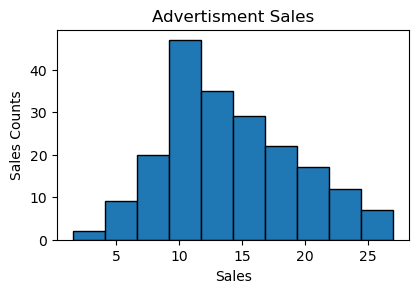

In [7]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.hist(data['sales'], bins=10, ec='black')
plt.title('Advertisment Sales')
plt.xlabel('Sales')
plt.ylabel('Sales Counts')
plt.show()

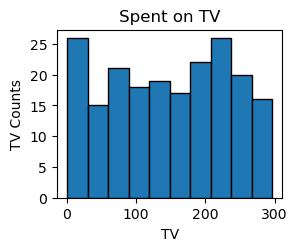

In [8]:
plt.subplot(2,2,2)
plt.hist(data['tv'], bins=10, ec='black')
plt.title('Spent on TV')
plt.xlabel('TV')
plt.ylabel('TV Counts')
plt.show()

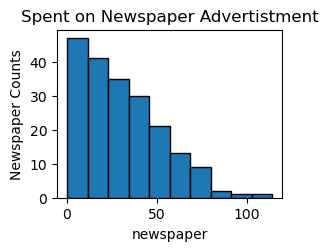

In [9]:
plt.subplot(2,2,3)
plt.hist(data['newspaper'], bins=10, ec='black')
plt.title('Spent on Newspaper Advertistment')
plt.xlabel('newspaper')
plt.ylabel('Newspaper Counts')
plt.show()

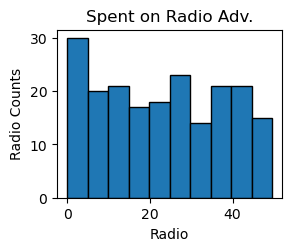

In [10]:
plt.subplot(2,2,4)
plt.hist(data['radio'], bins=10, ec='black')
plt.title('Spent on Radio Adv.')
plt.xlabel('Radio')
plt.ylabel('Radio Counts')
plt.show()

## Describe the Data

In [11]:
data.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
data.mean()

tv           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [13]:
data.median()

tv           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64

In [14]:
data.min()

tv           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64

In [15]:
data.max()

tv           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64

## Correlation Time

In [16]:
data.corr(method='pearson')

,tv,radio,newspaper,sales
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [17]:
mask = np.zeros_like(data.corr(method='pearson'))
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

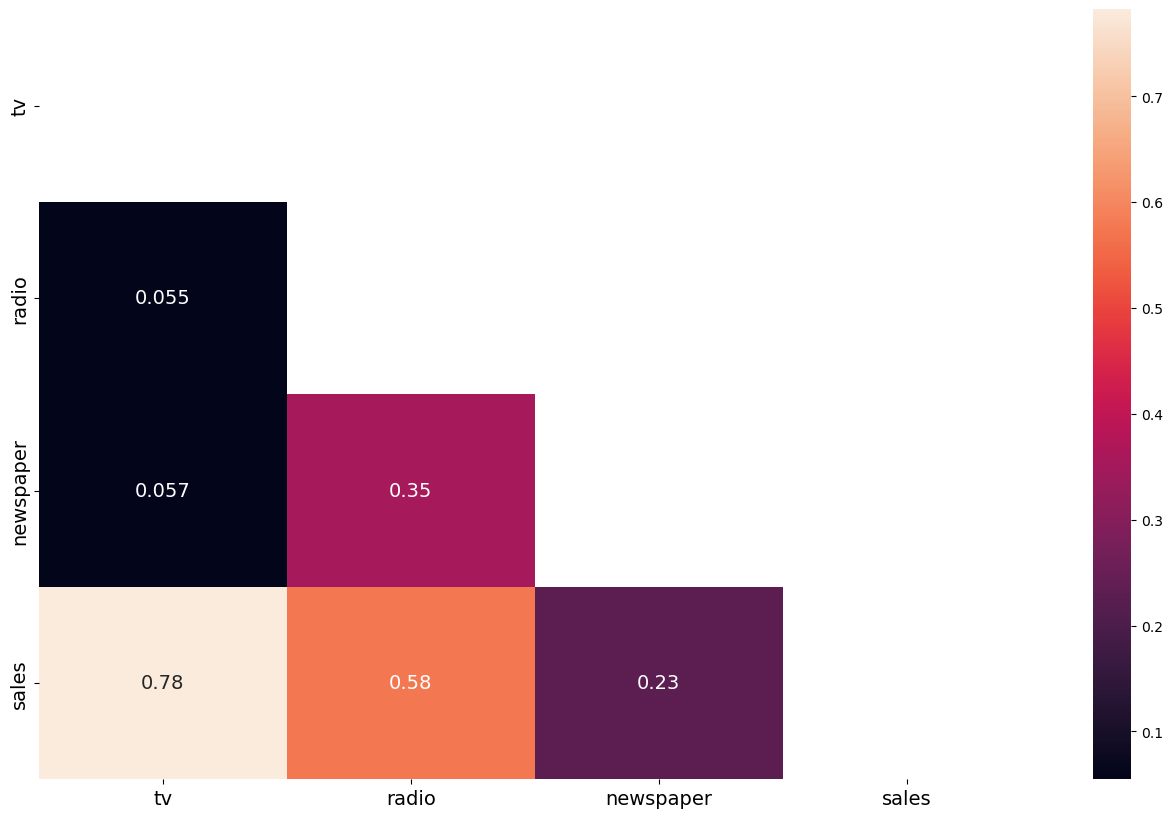

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), mask=mask, annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
tv = data['tv']
news = data['newspaper']
radio = data['radio']
sales = data.sales

Text(0.5, 1.0, 'TV v. Sales: Correlation =  0.782')

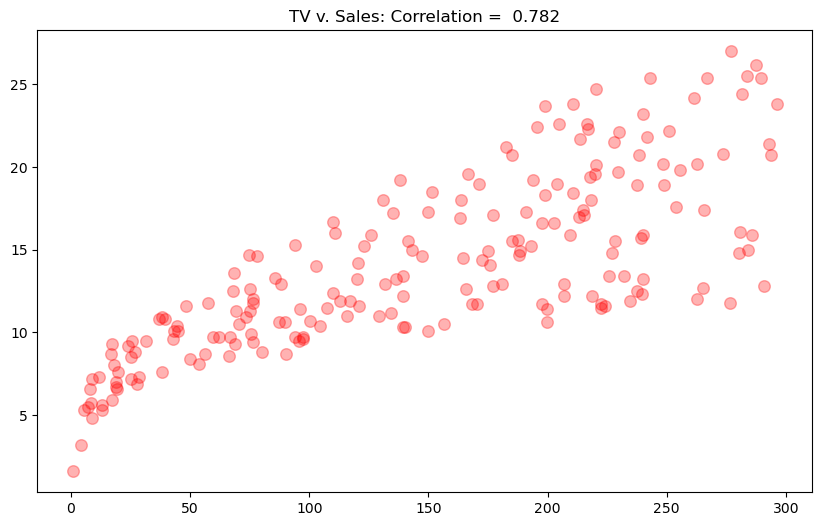

In [20]:
tv_sales_corr = round(tv.corr(sales),3)

plt.figure(figsize=(10,6))
plt.scatter(tv, sales, alpha=0.3, s=70, color='red')

plt.title(f'TV v. Sales: Correlation =  {tv_sales_corr}')

Text(0.5, 1.0, 'Radio v. Sales: Correlation =  0.576')

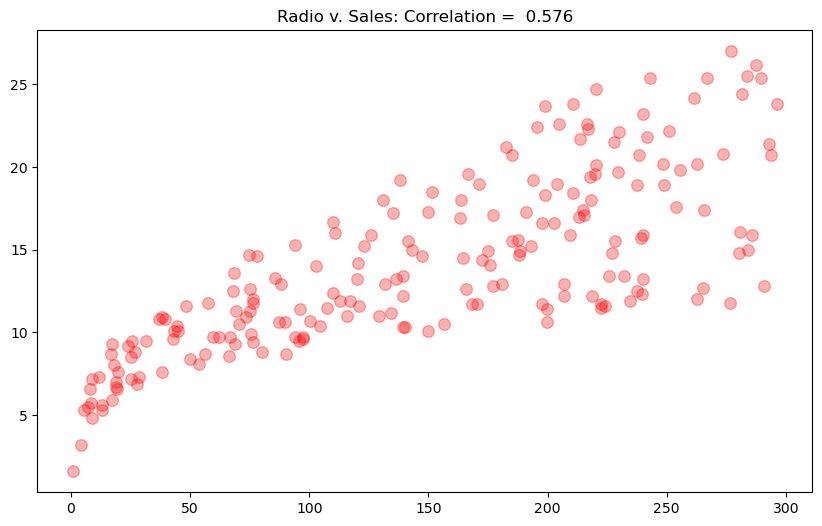

In [21]:
radio_sales_corr = round(radio.corr(sales),3)

plt.figure(figsize=(10,6))
plt.scatter(tv, sales, alpha=0.3, s=70, color='red')

plt.title(f'Radio v. Sales: Correlation =  {radio_sales_corr}')

Text(0.5, 1.0, 'Newspaper v. Sales: Correlation =  0.228')

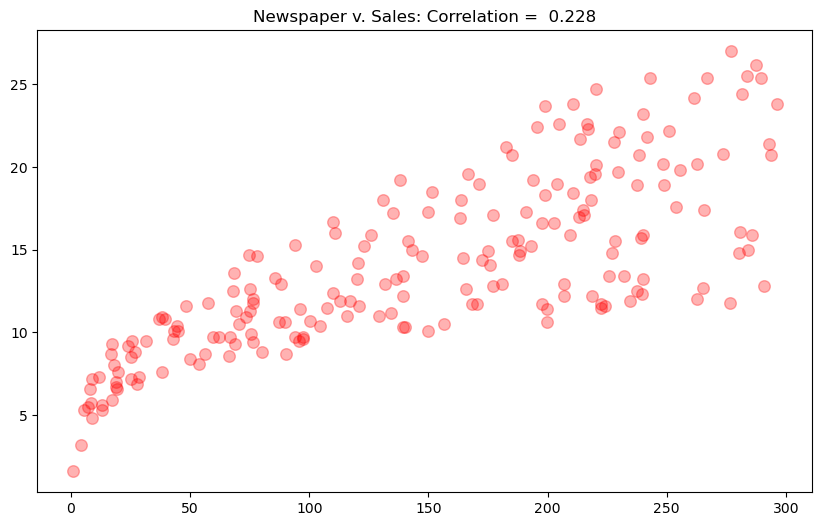

In [22]:
news_tv_corr = round(news.corr(sales),3)

plt.figure(figsize=(10,6))
plt.scatter(tv, sales, alpha=0.3, s=70, color='red')

plt.title(f'Newspaper v. Sales: Correlation =  {news_tv_corr}')

## Data Transformation

Seen earlier that sales has a left skew, checking that out now and transforming

In [23]:
data.sales.skew()

0.4075714250767127

In [24]:
y_log = np.log(data.sales)
y_log.skew()

-0.9560197526699552

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales with skew 0.408')

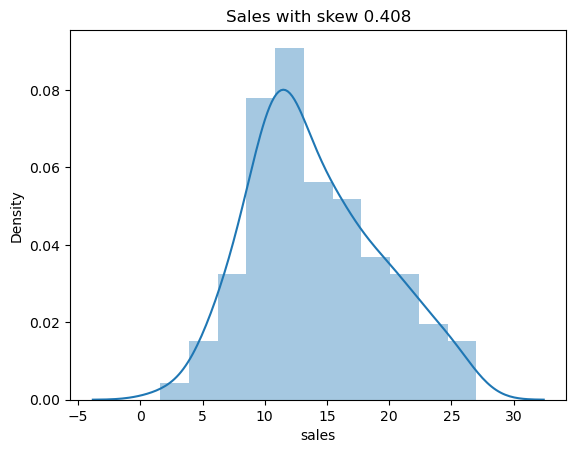

In [25]:
sns.distplot(data.sales)
plt.title(f'Sales with skew {round(data.sales.skew(),3)}')

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Sales with skew -0.956')

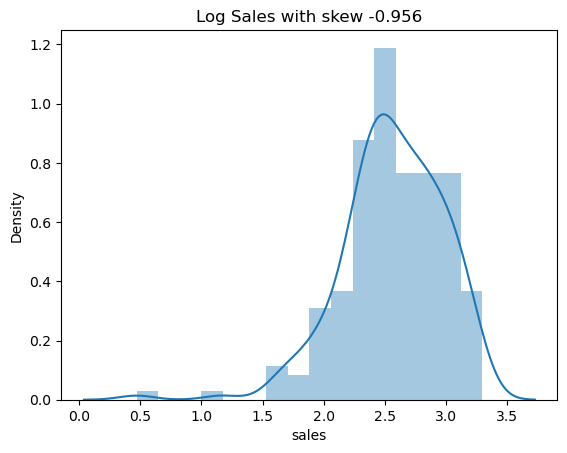

In [26]:
sns.distplot(y_log)
plt.title(f'Log Sales with skew {round(y_log.skew(),3)}')

It would probably be better to move forward with the normal sales. The skew is not strongly skewed distribution. 

## Model Time

Training a model with all columns as features

In [27]:
response1 = data.sales
features1 = data.drop('sales', axis=1)

In [28]:
response1.shape

(200,)

In [29]:
features1.shape

(200, 3)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features1, response1, test_size=0.30, random_state=10)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [31]:
pd.DataFrame(data=lin_reg.coef_, index=X_train.columns, columns=['coef'])

,coef
tv,0.043032
radio,0.193522
newspaper,-0.003867


In [32]:
print('Intercept', lin_reg.intercept_)
print('Training data r-squared: ', round(lin_reg.score(X_train, y_train),3))
print('Test data r-squared: ', round(lin_reg.score(X_test, y_test),3))

Intercept 3.4106415886118207
Training data r-squared:  0.921
Test data r-squared:  0.857


In [33]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# parameters
results.params

const        3.410642
tv           0.043032
radio        0.193522
newspaper   -0.003867
dtype: float64

Training model with only TV as feature

In [34]:
response2 = data.sales
features2 = data.drop(['sales','newspaper','radio'], axis=1)

In [35]:
features2

,tv
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [36]:
X_train, X_test, y_train, y_test = train_test_split(features2, response2, test_size=0.30, random_state=10)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [37]:
pd.DataFrame(data=lin_reg.coef_, index=X_train.columns, columns=['coef'])

,coef
tv,0.044747


In [38]:
print('Intercept', lin_reg.intercept_)
print('Training data r-squared: ', round(lin_reg.score(X_train, y_train),3))
print('Test data r-squared: ', round(lin_reg.score(X_test, y_test),3))

Intercept 7.308260742166187
Training data r-squared:  0.581
Test data r-squared:  0.645


In [39]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# parameters
results.params

const    7.308261
tv       0.044747
dtype: float64

There it is, just because TV has a higher correlation, doesnt mean the model would be better with that as the only feature. This model will benefit with more features. 